In [1]:
from d2l import torch as d2l
import torch

In [2]:
#@save
d2l.DATA_HUB['pokemon'] = (d2l.DATA_URL + 'pokemon.zip',
                           'c065c0e2593b8b161a2d7873e42418bf6a21106c')

data_dir = d2l.download_extract('pokemon')

In [3]:
import torchvision

In [4]:
batch_size = 256

In [5]:
transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

In [6]:
pokemon = torchvision.datasets.ImageFolder(data_dir, transformer)

In [7]:
data_iter = torch.utils.data.DataLoader(
    pokemon, batch_size=batch_size,
    shuffle=True, num_workers=d2l.get_dataloader_workers())

In [8]:
d2l.set_figsize((4, 4))
for X, y in data_iter:
    imgs = X[0:20,:,:,:].transpose(0, 2, 3, 1)/2+0.5
    d2l.show_images(imgs, num_rows=4, num_cols=5)
    break

TypeError: transpose() received an invalid combination of arguments - got (int, int, int, int), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


In [9]:
trainimages, trainlabels = next(iter(pokemon))
trainimages.shape

torch.Size([3, 64, 64])

transpose：是permute的精简版本。transpose(dim1, dim2)只能将两个维度进行互换
https://blog.csdn.net/yeyang911/article/details/79169895

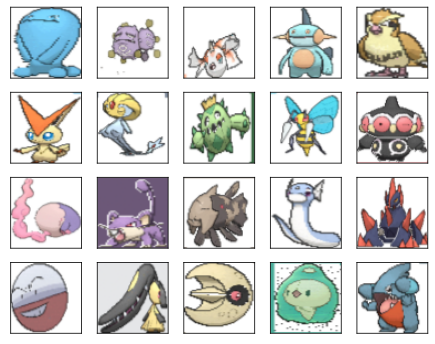

In [10]:
d2l.set_figsize((4, 4))
for X, y in data_iter:
    imgs = X[0:20,:,:,:].permute(0, 2, 3, 1)/2+0.5
    d2l.show_images(imgs, num_rows=4, num_cols=5)
    break

gan_torch_other.ipynb

In [11]:
class G_block(nn.Module):
    def __init__(self, channels, kernel_size=4,
                 strides=2, padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        self.conv2d_trans = nn.Conv2DTranspose(
            channels, kernel_size, strides, padding, use_bias=False)
        self.batch_norm = nn.BatchNorm()
        self.activation = nn.Activation('relu')

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))

NameError: name 'nn' is not defined

In [12]:
from torch import nn

In [13]:
class G_block(nn.Module):
    def __init__(self, channels, kernel_size=4,
                 strides=2, padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        self.conv2d_trans = nn.Conv2DTranspose(
            channels, kernel_size, strides, padding, use_bias=False)
        self.batch_norm = nn.BatchNorm()
        self.activation = nn.Activation('relu')

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [14]:
x = torch.zeros((2, 3, 16, 16))
g_blk = G_block(20)
g_blk.initialize()
g_blk(x).shape

AttributeError: module 'torch.nn' has no attribute 'Conv2DTranspose'

https://pytorch.org/docs/master/generated/torch.nn.ConvTranspose2d.html

https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [15]:
G_block = nn.Sequential()

https://blog.csdn.net/tony2278/article/details/104757744

http://preview.d2l.ai/d2l-en/master/chapter_computer-vision/transposed-conv.html?highlight=conv2dtranspose

http://preview.d2l.ai/d2l-en/master/chapter_convolutional-neural-networks/padding-and-strides.html#sec-padding

In [ ]:
G_block.add_module(in_channels, out_channels, kernel_size, strides, padding, bias=False)



class G_block(nn.Block):
    def __init__(self, channels, kernel_size=4,
                 strides=2, padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        self.conv2d_trans = nn.Conv2DTranspose(
            channels, kernel_size, strides, padding, use_bias=False)
        self.batch_norm = nn.BatchNorm()
        self.activation = nn.Activation('relu')

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))